In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("compressed_by_day.csv")

In [3]:
df

,Unnamed: 0,Date_s,day_frequency,maxTemp,weekday,workingday,month,precip
0,0,2018-01-01,1368,13.9,0,1,1,0
1,1,2018-01-02,3244,13.9,1,1,1,0
2,2,2018-01-03,2855,13.3,2,1,1,1
3,3,2018-01-04,3395,17.2,3,1,1,1
4,4,2018-01-05,2256,17.2,4,1,1,1
...,...,...,...,...,...,...,...,...
360,360,2018-12-27,3400,16.1,3,1,12,0
361,361,2018-12-28,3360,16.1,4,1,12,0
362,362,2018-12-29,2880,16.1,5,0,12,0
363,363,2018-12-30,2668,13.9,6,0,12,0


In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace= True)
df.head(10)

,Date_s,day_frequency,maxTemp,weekday,workingday,month,precip
0,2018-01-01,1368,13.9,0,1,1,0
1,2018-01-02,3244,13.9,1,1,1,0
2,2018-01-03,2855,13.3,2,1,1,1
3,2018-01-04,3395,17.2,3,1,1,1
4,2018-01-05,2256,17.2,4,1,1,1
5,2018-01-06,1784,13.3,5,0,1,1
6,2018-01-07,1436,13.3,6,0,1,0
7,2018-01-08,861,12.8,0,1,1,1
8,2018-01-09,3357,14.4,1,1,1,1
9,2018-01-10,3499,13.9,2,1,1,1


In [5]:
df["Date_s"] = pd.to_datetime(df["Date_s"])

## How does the Temperature impact the number of rides in a day?

In [7]:
# let us define our dependent (y) and independent (x) variables for peak electricity load prediction

xp = df['maxTemp']

yp = df['day_frequency']

#min_H_temp, max_H_temp = xp.min(), xp.max()

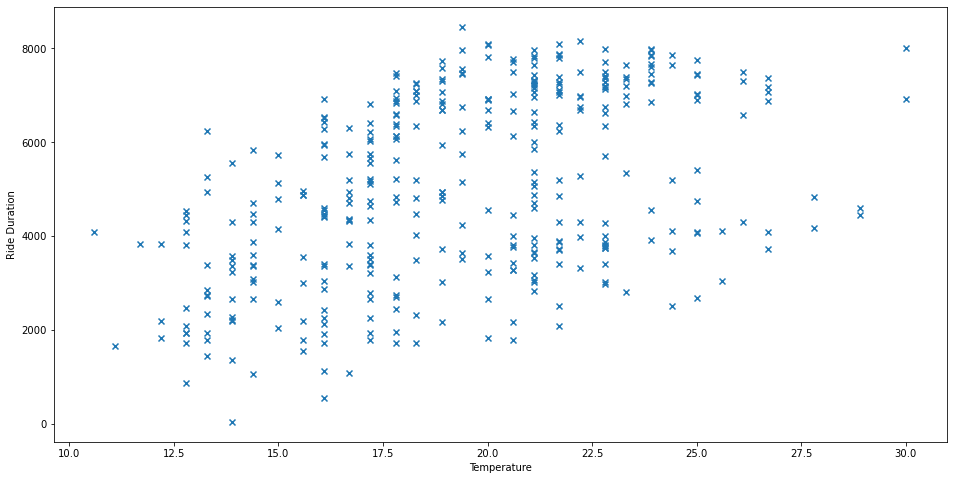

In [8]:
fig, ax = plt.subplots(figsize = (16,8))
# Plotting the data
ax.scatter(xp, yp, marker='x',)
ax.set_xlabel("Temperature")
ax.set_ylabel("Ride Duration")

plt.show()
#saving figures (You can comment-out this line inorder not to save figures)
#plt.savefig('summer data_peak demand.pdf')

In [9]:
X = df['maxTemp'].values.reshape((-1,1)) # if we pass a 1-feature array we need to re-shape it! This is not required for multi-dimenisonal arrays
y = df['day_frequency']

In [10]:
# initialize model
linear_model = LinearRegression(fit_intercept=True, normalize=False)

In [12]:
# train model
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)

[234.71008509] 494.3719503301536


In [13]:
linear_model.intercept_

494.3719503301536

In [14]:
# predict on new data
Xnew = np.array([[20]]) #no. of rides when it is 20°

print(linear_model.predict(Xnew))

[5188.57365219]


[234.71008509] 494.3719503301536


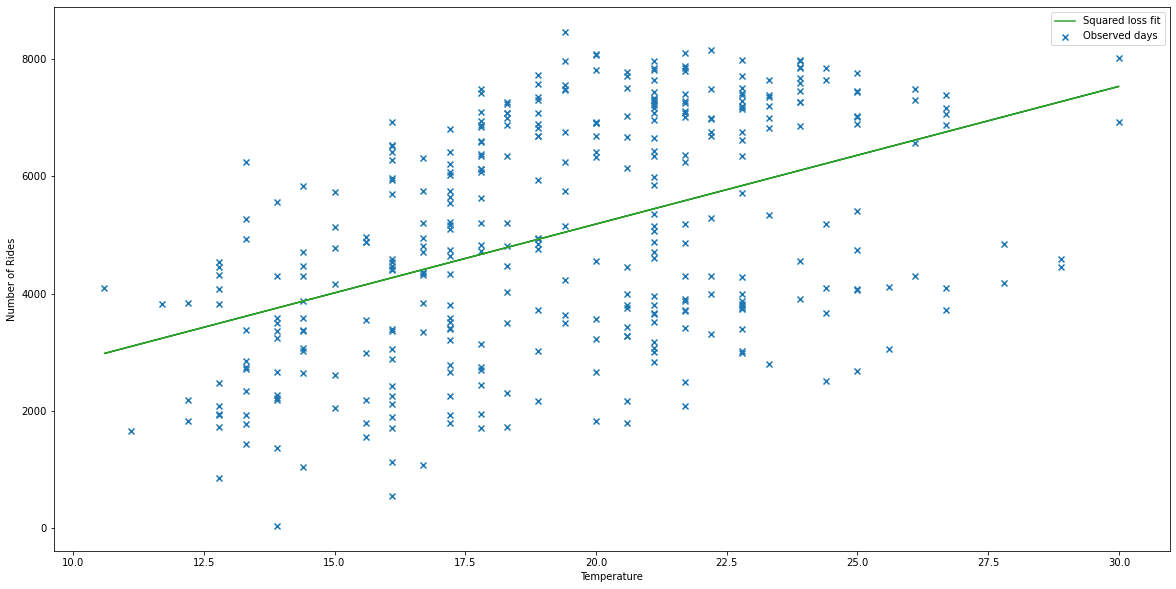

In [15]:
lr = LinearRegression()
lr.fit(xp.values.reshape(-1,1), yp)
model_pred = lr.predict(xp.values.reshape(-1,1))


fig,ax = plt.subplots(figsize = (20,10))

ax.scatter(xp, yp, marker="x")
ax.set_xlabel("Temperature")
ax.set_ylabel("Number of Rides")

ax.plot(xp, model_pred, c='C2')
ax.legend(['Squared loss fit','Observed days'])
#plt.savefig('linearRegression_TempDaily.pdf')
print(lr.coef_, lr.intercept_)

As expected a linear regression is not the best use for our data so in the next step we will try to do a polynomial regression

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
y_true = df["day_frequency"]
y_pred = linear_model.predict(df["day_frequency"].values.reshape((-1,1)))

In [18]:
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"(GW)^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"GW")

Mean Squared Error: 1590121368093.8452 (GW)^2
Root Mean Squared Error: 1261000.1459531419 GW


In [19]:
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"GW")

Mean Absolute Error: 1174177.4550636432 GW


In [20]:
print("Coefficient of determination:",r2_score(y_pred, y_true))

Coefficient of determination: -6.45689103205277


## Now lets focus on polynomial regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
xp = df["maxTemp"].values
yp = df["day_frequency"].values

In [23]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(),X.max() ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.title("Regression with 2 degree polynomial")
    plt.xlabel("Temperature")
    plt.ylabel("Number of Rides")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    plt.savefig("RegressionTemperatureDaily.pdf")
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

The R^2 for quadratic curve is:  0.2417121148187915


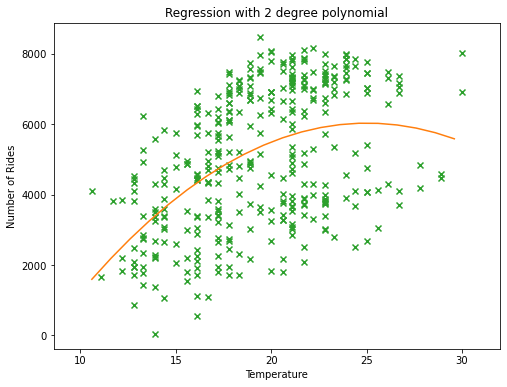

In [24]:
plot_regression_poly_scikit(X = xp, Y = yp, d = 2)

The R^2 for quadratic curve is:  0.2519071729507639


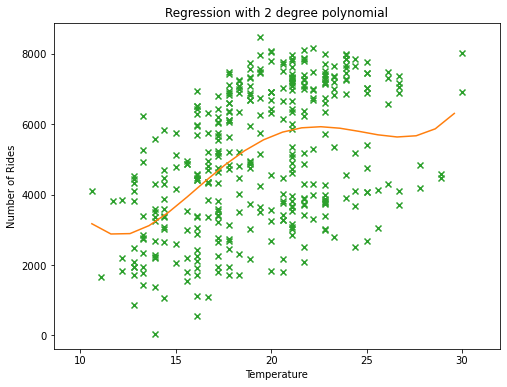

In [25]:
plot_regression_poly_scikit(X = xp, Y = yp, d = 4)

In [26]:
Xnew = np.array([[20]]) #no. of rides when it is 20°

print(linear_model.predict(Xnew))

[5188.57365219]


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)
X_seq = np.linspace(X.min(),X.max(),300).reshape(-1,1)

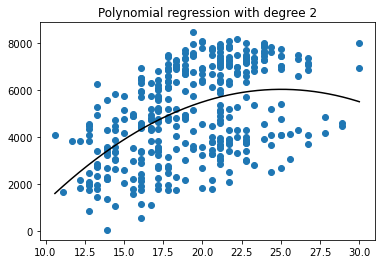

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# split the data with 70-30% split 
x_train, x_test, y_train, y_test = train_test_split(df["maxTemp"], df["day_frequency"], test_size=0.3,random_state=41)

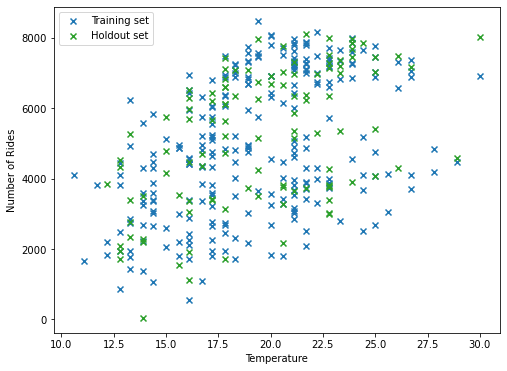

In [32]:
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_test, y_test, marker='x', color="C2")
plt.xlabel("Temperature")
plt.ylabel("Number of Rides")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [33]:
def ls_poly(x, y, d):
    
    # Create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

Text(0, 0.5, 'Mean squared error')

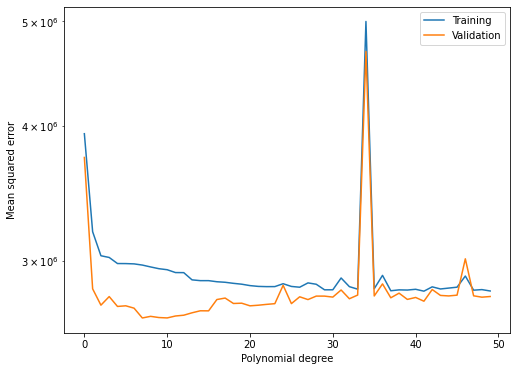

In [34]:
min_x_train, max_x_train = x_train.min(), x_train.max()
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_cv = []
for i in range(50):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

plt.figure(figsize = (8,6))
plt.semilogy(range(50), err_train, range(50), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Mean squared error')

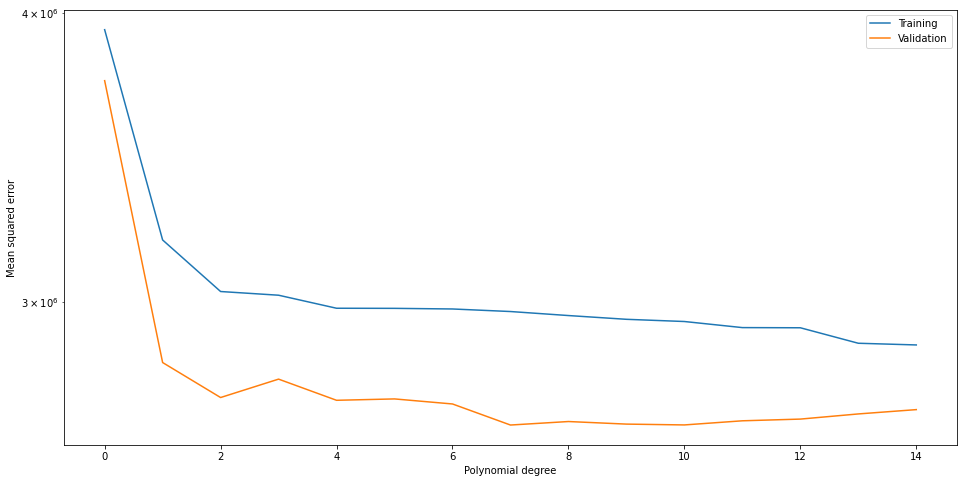

In [35]:
min_x_train, max_x_train = x_train.min(), x_train.max()
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_cv = []
for i in range(15):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

plt.figure(figsize = (16,8))    
plt.semilogy(range(15), err_train, range(15), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

## Sweet spot between 2 and 4 degrees of the polynomial

Now we do the same thing but split the data into three parts.

In [36]:
# Do a 70-30 split first
X_train, X_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3,random_state=34 )

# now split X_train to achive 50-20-30 split
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=34)

Check if split is correct

In [38]:
print(len(X_train),len(X_hold),len(X_test))

182 73 110


Text(0, 0.5, 'Mean squared error')

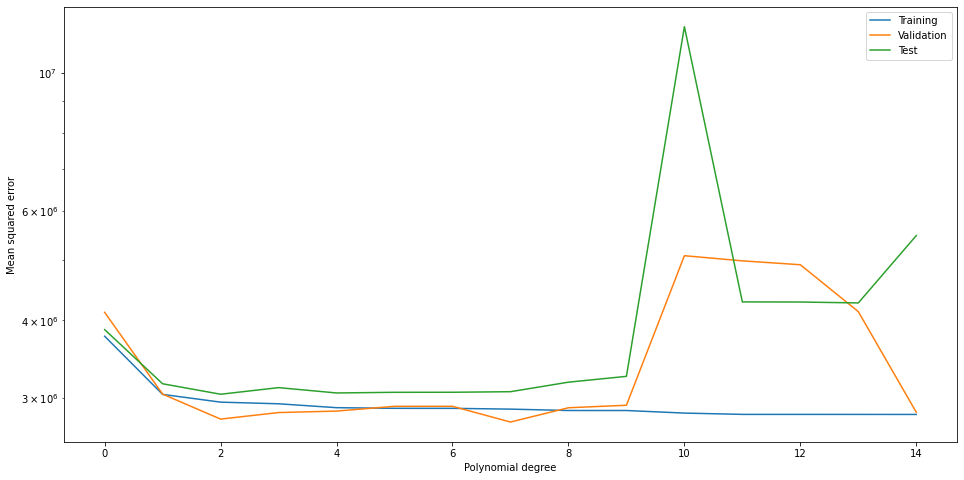

In [39]:
min_x_train, max_x_train = X_train.min(), X_train.max()
x_train = 2*(X_train - min_x_train)/(max_x_train - min_x_train) - 1
x_hold = 2*(X_hold - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(X_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_hold = []
err_test = []
for i in range(15):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_hold.append(((poly_feat(x_hold,i) @ theta - y_hold)**2).mean())
    err_test.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())
plt.figure(figsize = (16,8)) 
plt.semilogy(range(15), err_train, range(15), err_hold,range(15), err_test)
plt.legend(["Training", "Validation", "Test"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")